<a href="https://colab.research.google.com/github/anup-anny/Porter-delivery-estimation-regression/blob/main/QT_analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
from seaborn.rcmod import set_style
# Importing libraries

import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style= 'whitegrid', palette = 'mako')

import datetime as dt
from datetime import datetime

# Importing Models libraries

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Feature scalers and transformers
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer

# Scientific python and statistical packages
import scipy
import statsmodels as stm

# QQ plot
from statsmodels.api import ProbPlot, qqplot
from statsmodels.graphics.gofplots import qqplot

# Lillifers
from statsmodels.stats.diagnostic import lilliefors

# Ordinary Least Squares
from statsmodels.formula.api import ols

# ANOVA Table
from statsmodels.stats.api import anova_lm


In [90]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# reading the dataset
df_orignal = pd.read_excel('/content/drive/MyDrive/QT-ANALYSIS/Porter_DeliveryTimeEstimation.xlsx')

In [4]:
# Making a copy of dataset for safety purpose
df = df_orignal.copy()

In [5]:
df.shape

(197428, 19)

In [6]:
#read and describe the data set
df.head()


,Order Id,market_id,created_at,Created At (Date),Created At (Time),actual_delivery_time,ADT(Date),ADT(Time),store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1,1.0,2015-02-06 22:24:17,2015-02-06,22:24:17,2015-02-06 23:27:16,NaN,NaN,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2,2.0,2015-02-10 21:49:25,2015-02-10,21:49:25,2015-02-10 22:56:29,NaN,NaN,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3,3.0,2015-01-22 20:39:28,2015-01-22,20:39:28,2015-01-22 21:09:09,NaN,NaN,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,4,3.0,2015-02-03 21:21:45,2015-02-03,21:21:45,2015-02-03 22:13:00,NaN,NaN,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,5,3.0,2015-02-15 02:40:36,2015-02-15,02:40:36,2015-02-15 03:20:26,NaN,NaN,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Order Id                  197428 non-null  int64         
 1   market_id                 196441 non-null  float64       
 2   created_at                197428 non-null  datetime64[ns]
 3   Created At (Date)         197428 non-null  datetime64[ns]
 4   Created At (Time)         197428 non-null  object        
 5   actual_delivery_time      197421 non-null  datetime64[ns]
 6   ADT(Date)                 0 non-null       float64       
 7   ADT(Time)                 0 non-null       float64       
 8   store_id                  197428 non-null  object        
 9   store_primary_category    192668 non-null  object        
 10  order_protocol            196433 non-null  float64       
 11  total_items               197428 non-null  int64         
 12  su

In [8]:
#Describing the data
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Order Id,197428.0,NaN,NaN,NaN,NaT,NaT,98714.5,56992.69881,1.0,49357.75,98714.5,148071.25,197428.0
market_id,196441.0,NaN,NaN,NaN,NaT,NaT,2.978706,1.524867,1.0,2.0,3.0,4.0,6.0
created_at,197428,180985,2015-02-11 19:50:43,6,2014-10-19 05:24:15,2015-02-18 06:00:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Created At (Date),197428,30,2015-02-07 00:00:00,9149,2014-10-19 00:00:00,2015-02-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Created At (Time),197428,46077,02:27:40,23,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
actual_delivery_time,197421,178110,2015-02-11 20:40:45,5,2015-01-21 15:58:11,2015-02-19 22:45:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADT(Date),0.0,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADT(Time),0.0,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_id,197428,6743,d43ab110ab2489d6b9b2caa394bf920f,937,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_primary_category,192668,74,american,19399,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#finding the null values
df.isna().sum()

Order Id                         0
market_id                      987
created_at                       0
Created At (Date)                0
Created At (Time)                0
actual_delivery_time             7
ADT(Date)                   197428
ADT(Time)                   197428
store_id                         0
store_primary_category        4760
order_protocol                 995
total_items                      0
subtotal                         0
num_distinct_items               0
min_item_price                   0
max_item_price                   0
total_onshift_partners       16262
total_busy_partners          16262
total_outstanding_orders     16262
dtype: int64

In [10]:
# Calculate the total number of rows in the DataFrame
total_rows = len(df)

# Calculate the null value percentage for each column
null_percentage = ((df.isnull().sum() / total_rows) * 100).round(1)

print(null_percentage)

Order Id                      0.0
market_id                     0.5
created_at                    0.0
Created At (Date)             0.0
Created At (Time)             0.0
actual_delivery_time          0.0
ADT(Date)                   100.0
ADT(Time)                   100.0
store_id                      0.0
store_primary_category        2.4
order_protocol                0.5
total_items                   0.0
subtotal                      0.0
num_distinct_items            0.0
min_item_price                0.0
max_item_price                0.0
total_onshift_partners        8.2
total_busy_partners           8.2
total_outstanding_orders      8.2
dtype: float64


In [11]:
df.rename(columns={'store_primary_category': 'Cuisine'}, inplace=True)


In [12]:
# Handeling Null Values
# Other columns might Have potential information fo filling the null values according to nature of column

df['total_onshift_partners'] = df['total_onshift_partners'].fillna(df['total_onshift_partners'].mean().round(0))
df['total_busy_partners'] = df['total_busy_partners'].fillna(df['total_busy_partners'].mean().round(0))
df['total_outstanding_orders'] = df['total_outstanding_orders'].fillna(df['total_outstanding_orders'].mean().round(0))


In [13]:
# Rest null values have categorical values and the ration of data is not huge so we are'nt loosing too much info
df = df.drop(columns = ['ADT(Date)','ADT(Time)'])

In [14]:
#finding the null values
df.isna().sum()

Order Id                       0
market_id                    987
created_at                     0
Created At (Date)              0
Created At (Time)              0
actual_delivery_time           7
store_id                       0
Cuisine                     4760
order_protocol               995
total_items                    0
subtotal                       0
num_distinct_items             0
min_item_price                 0
max_item_price                 0
total_onshift_partners         0
total_busy_partners            0
total_outstanding_orders       0
dtype: int64

In [15]:
df = df.dropna()

In [16]:
#finding the null values
df.isna().sum()

Order Id                    0
market_id                   0
created_at                  0
Created At (Date)           0
Created At (Time)           0
actual_delivery_time        0
store_id                    0
Cuisine                     0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

In [17]:
# Checking Duplicate Values

print(len(df[df.duplicated()]))


0


In [18]:
# checking unique values
df.nunique()

Order Id                    191921
market_id                        6
created_at                  176413
Created At (Date)               30
Created At (Time)            45823
actual_delivery_time        173627
store_id                      6567
Cuisine                         74
order_protocol                   7
total_items                     57
subtotal                      8319
num_distinct_items              20
min_item_price                2297
max_item_price                2632
total_onshift_partners         172
total_busy_partners            158
total_outstanding_orders       281
dtype: int64

In [19]:
#Data Type-casting
int_cols = ["Order Id", "market_id","order_protocol", "total_items", "subtotal", "num_distinct_items", "min_item_price", "max_item_price", "total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]

df[int_cols] = df[int_cols].astype(int)

date_cols = ['created_at', 'actual_delivery_time']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%m/%d/%Y %H:%M')


In [20]:
# removing Redundancy
# dropping year 2014 data coz it is having only 1 entry

df = df[df['created_at'].dt.year != 2014]


In [21]:
# Dividing Cusine into categories

cuisine_counts = df['Cuisine'].value_counts()
top_20_cuisines = cuisine_counts.head(20).index.tolist()
cuisine_categories = {}
for cuisine in top_20_cuisines:
    cuisine_categories[cuisine] = cuisine
for cuisine in cuisine_counts.index:
    if cuisine not in top_20_cuisines:
        cuisine_categories[cuisine] = 'Other'
def map_cuisine_to_category(cuisine):
    return cuisine_categories[cuisine]
df['Cuisine_Category'] = df['Cuisine'].apply(map_cuisine_to_category)

In [22]:
# derriving new columns

df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['created_at'] = pd.to_datetime(df['created_at'])

df['Time_gap_between_delivery'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df['Time_gap_between_delivery'].astype(int)
df['Time_gap_between_delivery'].sort_values(ascending=False)

buckets = [(i*30, (i+1)*30) for i in range(5)]

def categorize_time_gap(time_gap):
    for start, end in buckets:

        if start <= time_gap <= end:
            return f"{start}-{end} min"
    return "150+ min"

df['Time_gap_between_delivery_bucket'] = df['Time_gap_between_delivery'].apply(categorize_time_gap)



In [23]:
df['actual_delivery_time']=df['actual_delivery_time'].astype('datetime64[ns]')
df['created_at']=df['created_at'].astype('datetime64[ns]')

#hour: 0 = 12:am then 23 = 11pm
df['hour']=df['created_at'].dt.hour

#Monday: 0 to sunday:6
df['day']=df['created_at'].dt.dayofweek

In [24]:
df['Cuisine_cat_code']=df['Cuisine'].astype('category').cat.codes

df.head()

,Order Id,market_id,created_at,Created At (Date),Created At (Time),actual_delivery_time,store_id,Cuisine,order_protocol,total_items,...,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Cuisine_Category,Time_gap_between_delivery,Time_gap_between_delivery_bucket,hour,day,Cuisine_cat_code
0,1,1,2015-02-06 22:24:17,2015-02-06,22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1,4,...,1239,33,14,21,american,62.983333,60-90 min,22,4,4
1,2,2,2015-02-10 21:49:25,2015-02-10,21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2,1,...,1400,1,2,2,mexican,67.066667,60-90 min,21,1,47
8,9,2,2015-02-16 00:11:35,2015-02-16,00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,indian,3,4,...,1604,8,6,18,indian,26.433333,0-30 min,0,0,36
14,15,1,2015-02-12 03:36:46,2015-02-12,03:36:46,2015-02-12 04:14:39,ef1e491a766ce3127556063d49bc2f98,italian,1,1,...,1525,5,6,8,italian,37.883333,30-60 min,3,3,39
15,16,1,2015-01-27 02:12:36,2015-01-27,02:12:36,2015-01-27 03:02:24,ef1e491a766ce3127556063d49bc2f98,italian,1,2,...,2195,5,5,7,italian,49.800000,30-60 min,2,1,39


# **EDA VIZ** (Univariate Analysis)


In [25]:
# for Categorical Features

def generate_countplot(df, column_name, fig_size=(10, 8)):
    plt.figure(figsize=fig_size)
    value_counts_sorted = df[column_name].value_counts().sort_values(ascending=False)
    sns.countplot(data=df, y=column_name, order=value_counts_sorted.index)
    plt.title(f'Count Plot for {column_name}')
    for p in plt.gca().patches:
        plt.text(p.get_width() + 0.3, p.get_y() + p.get_height() / 2, f'{p.get_width():.0f}', ha='left', va='center')

    plt.show()

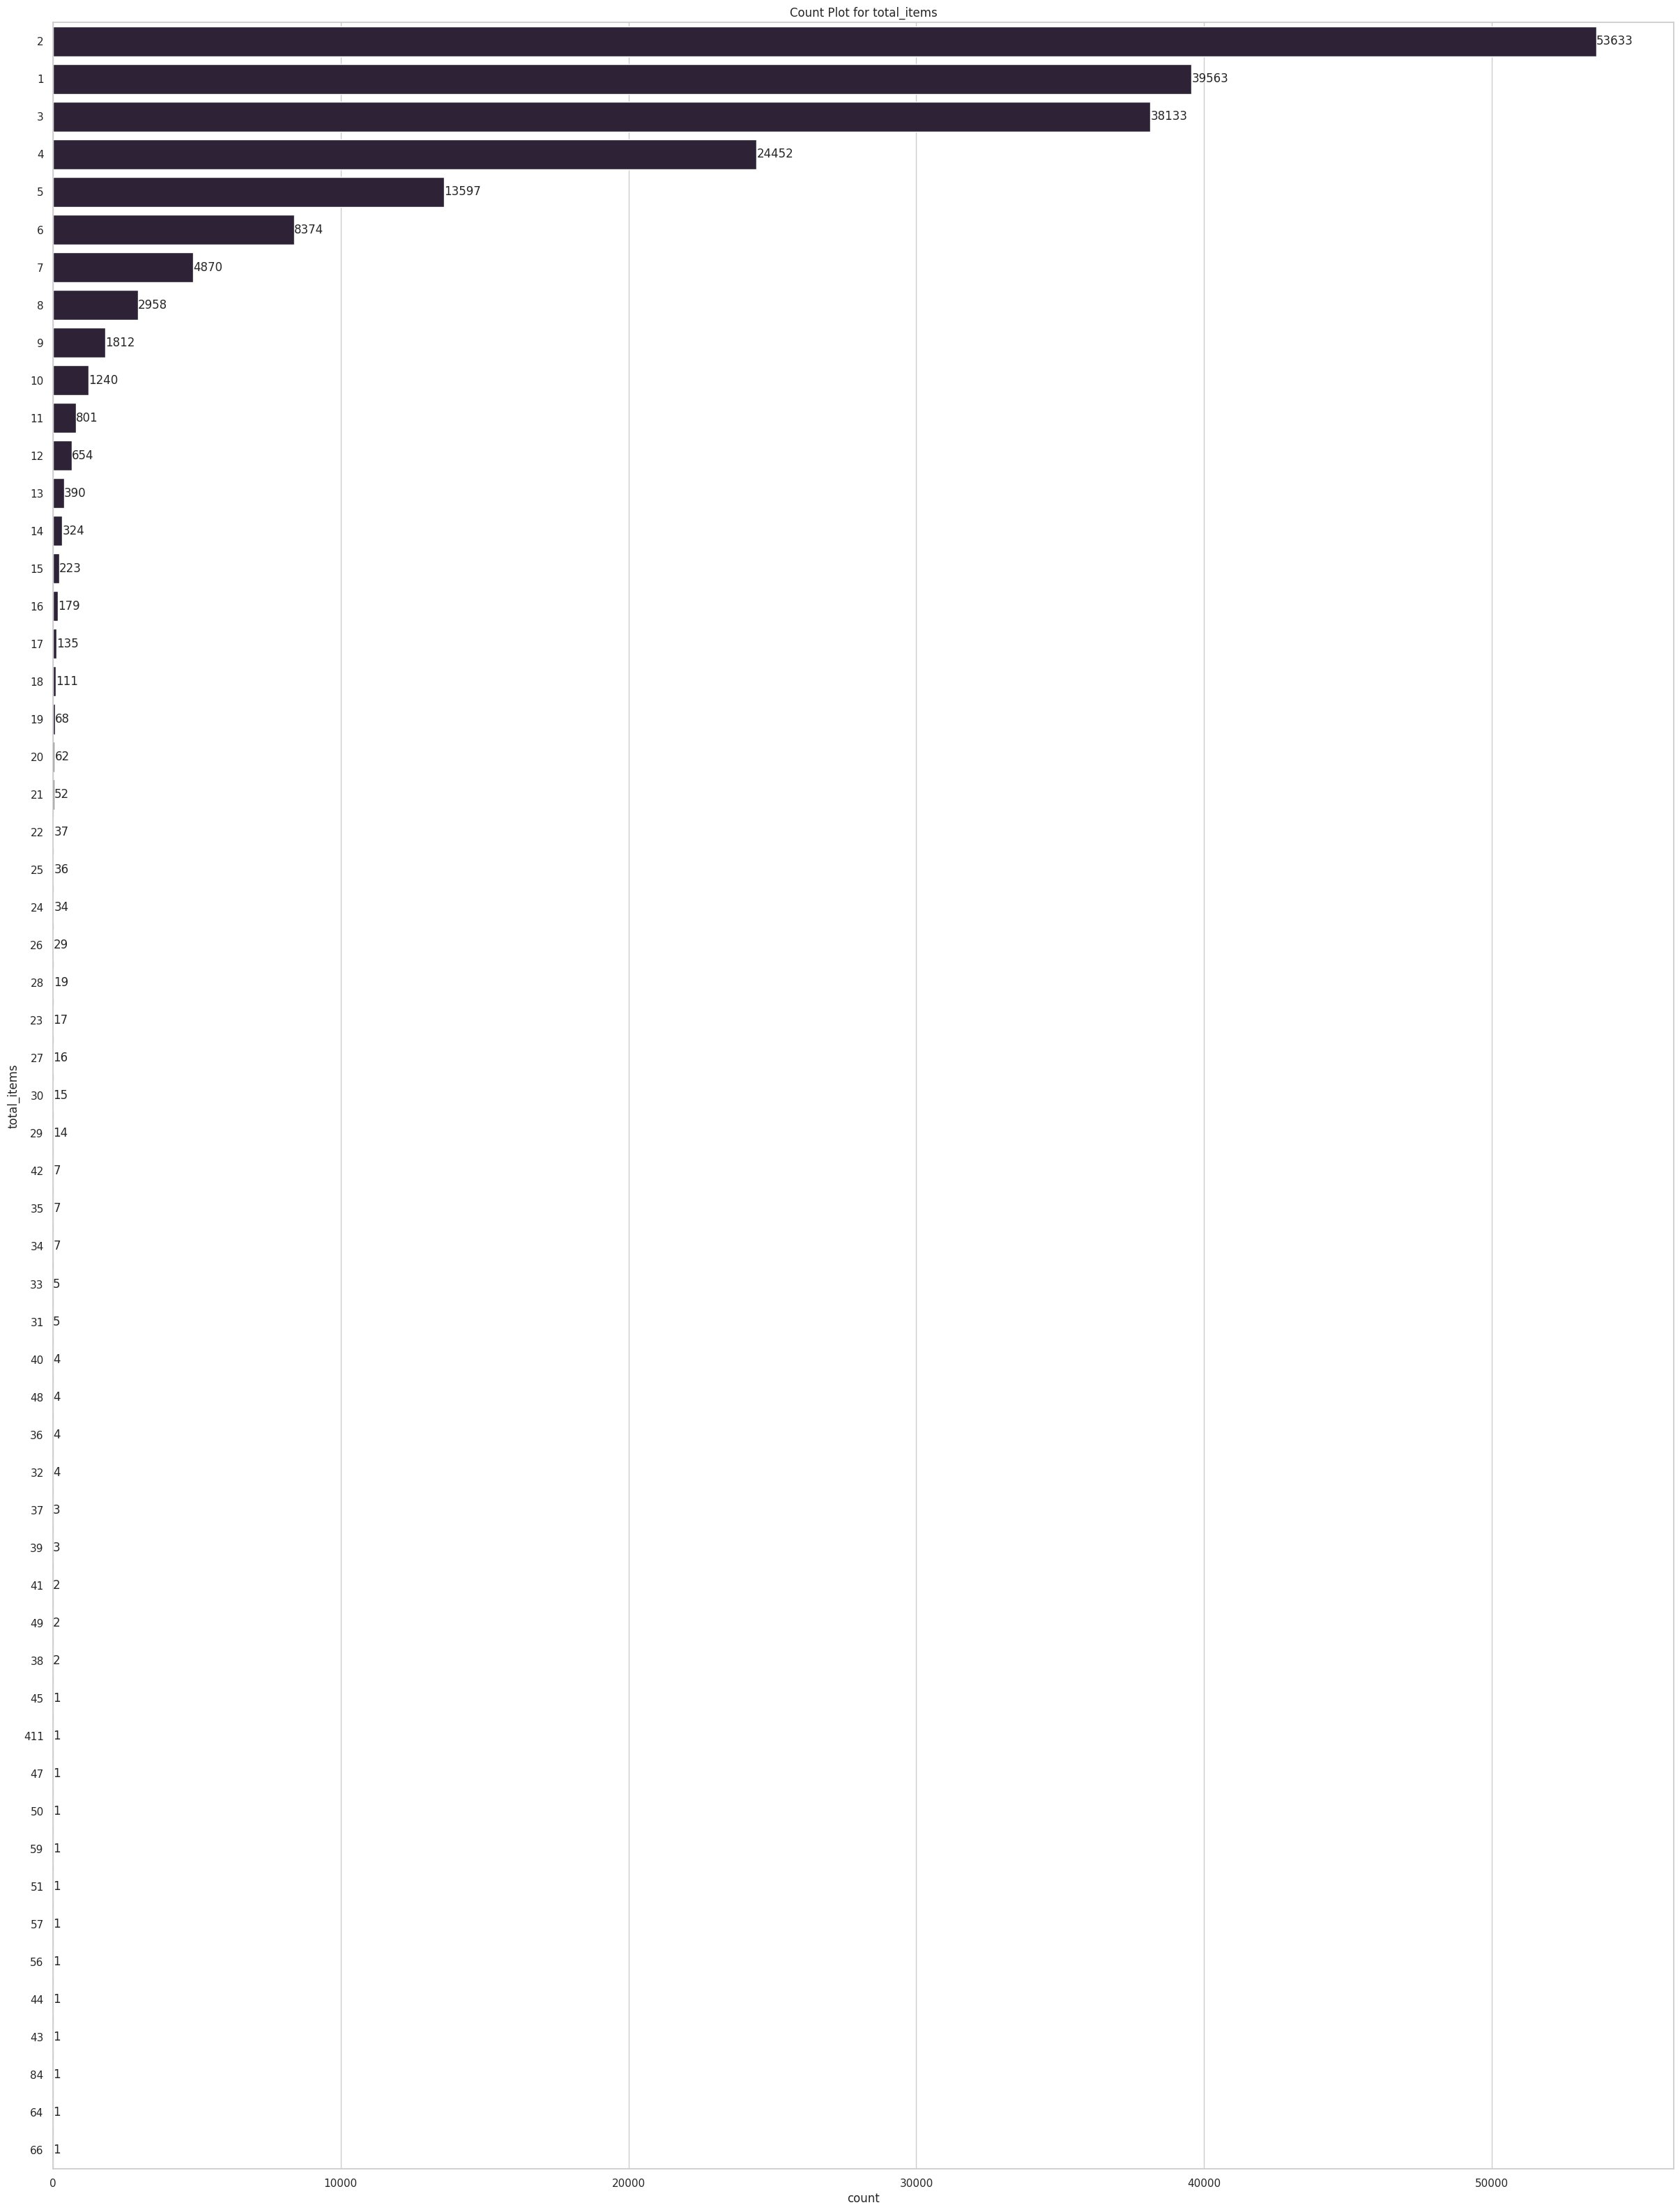

In [26]:
generate_countplot(df,'total_items',fig_size=(30,40))

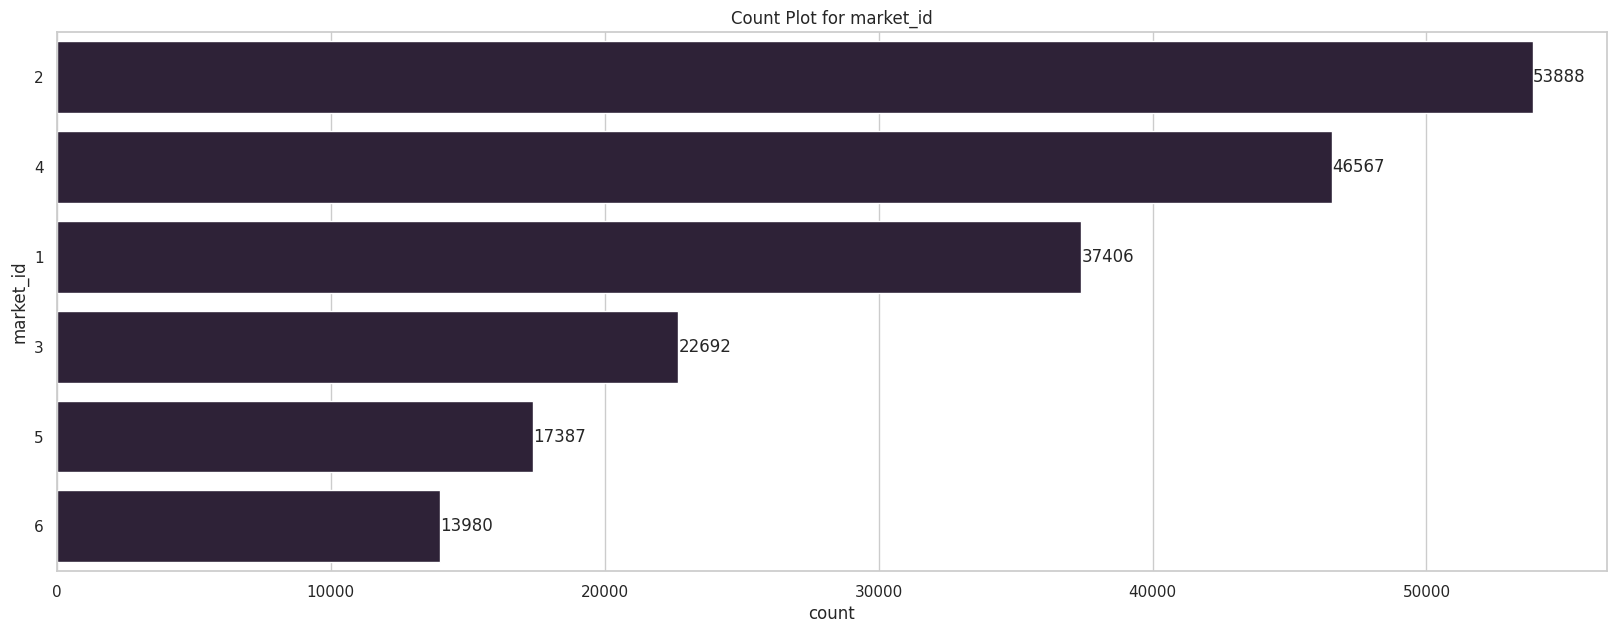

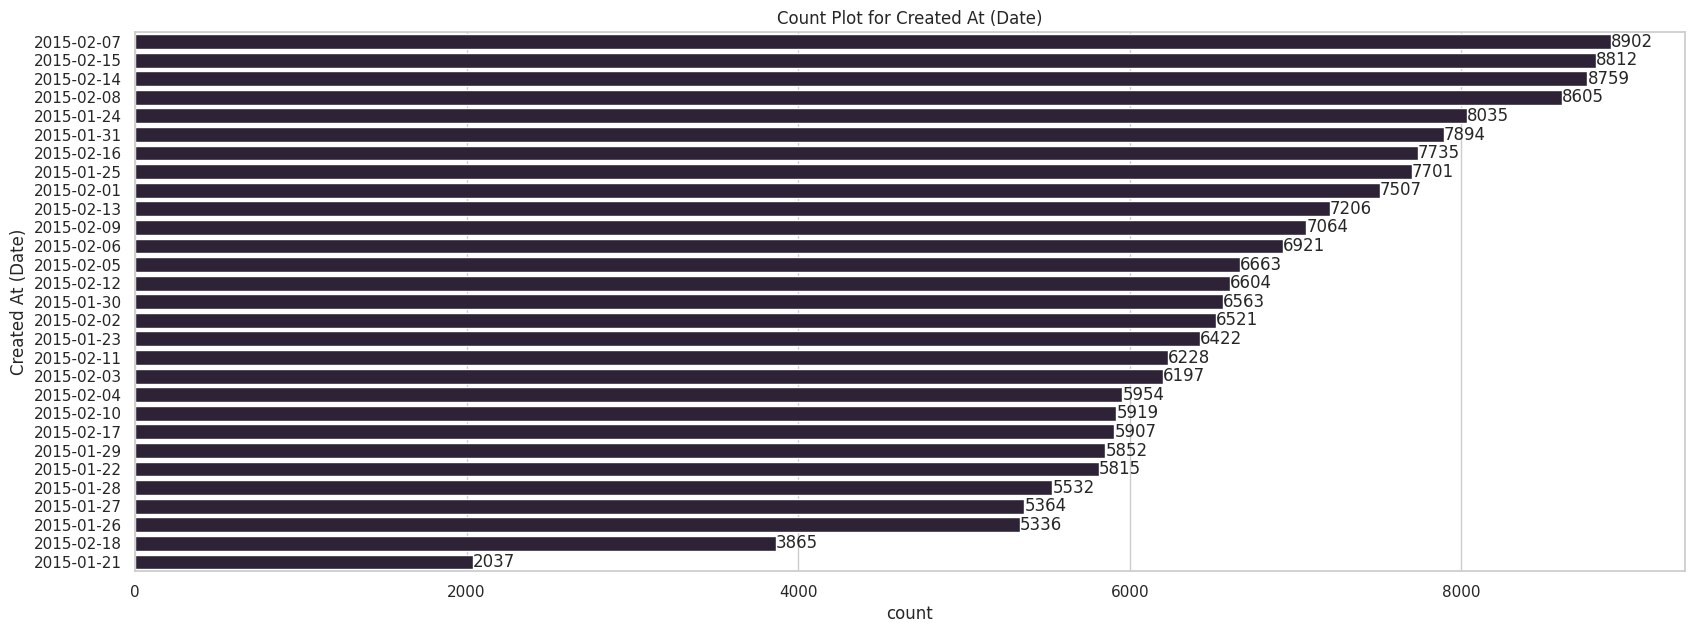

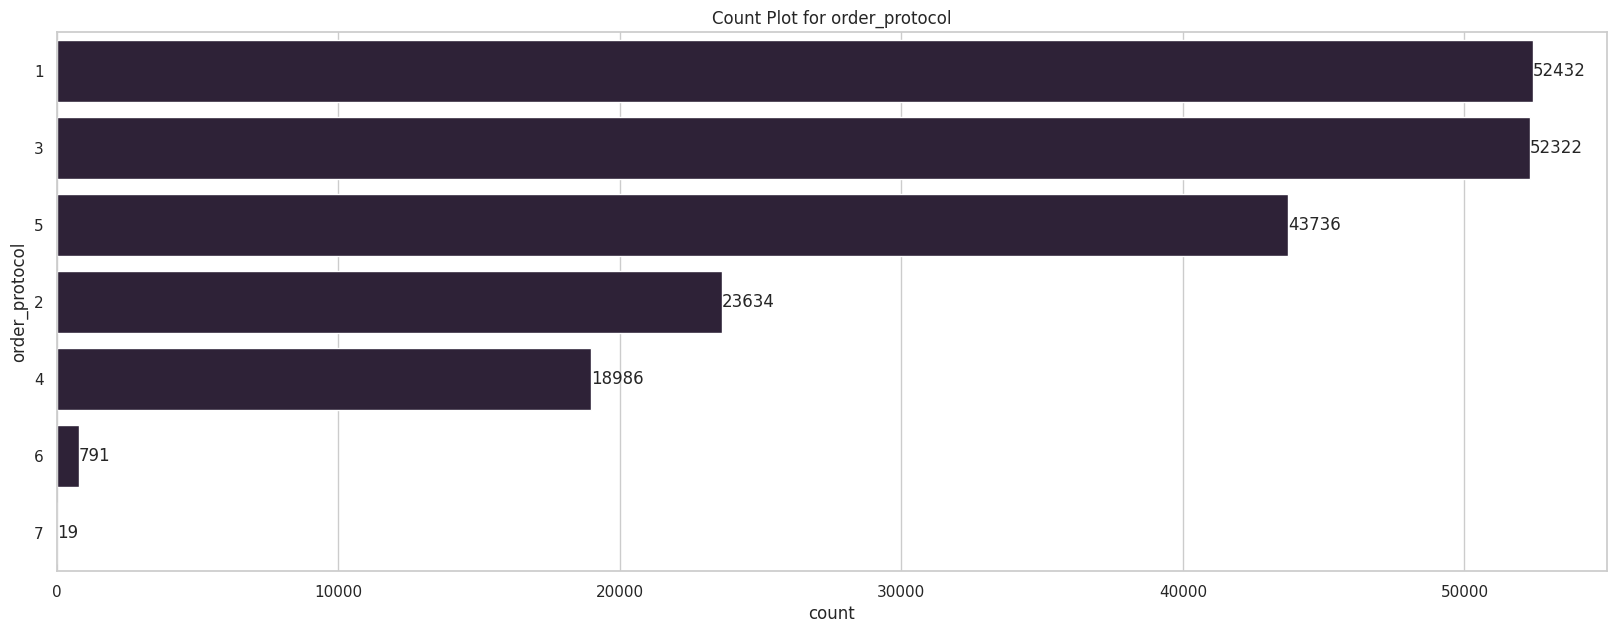

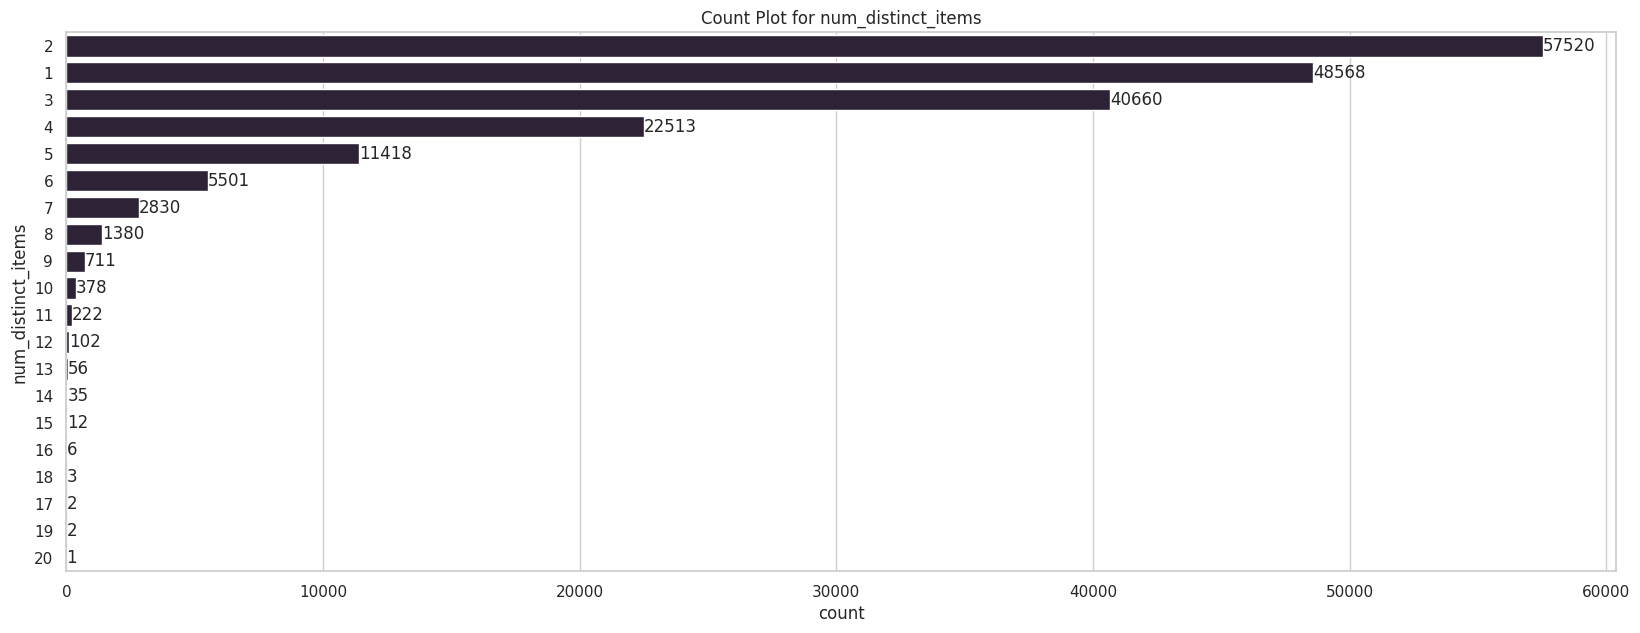

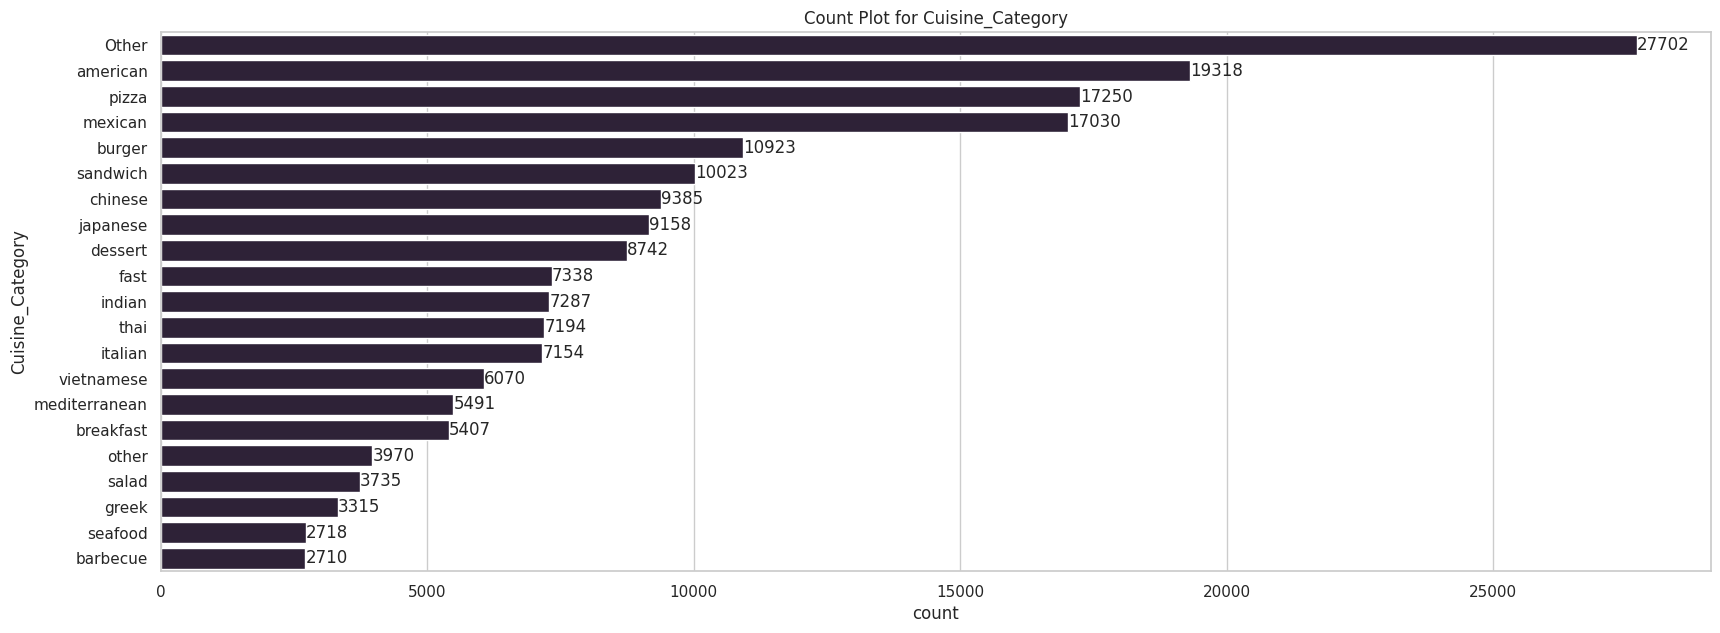

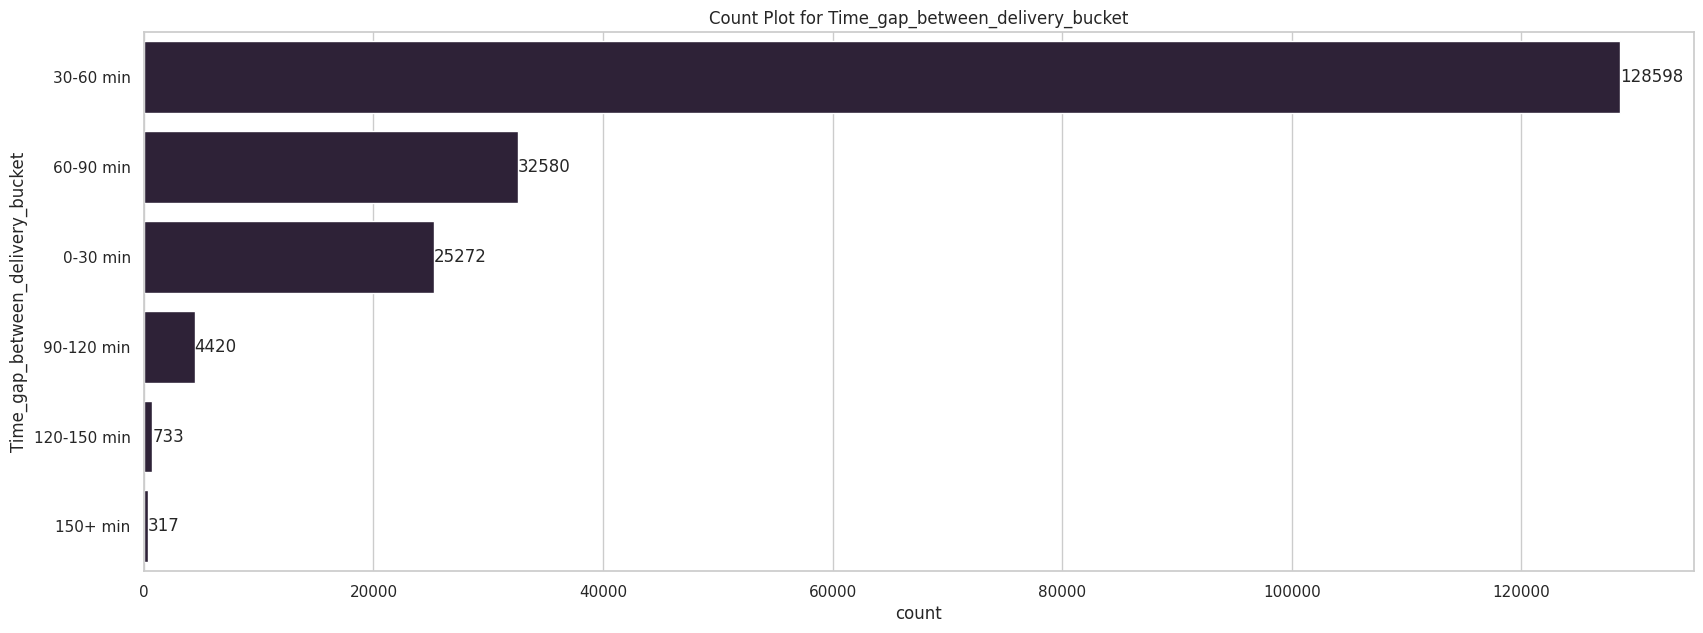

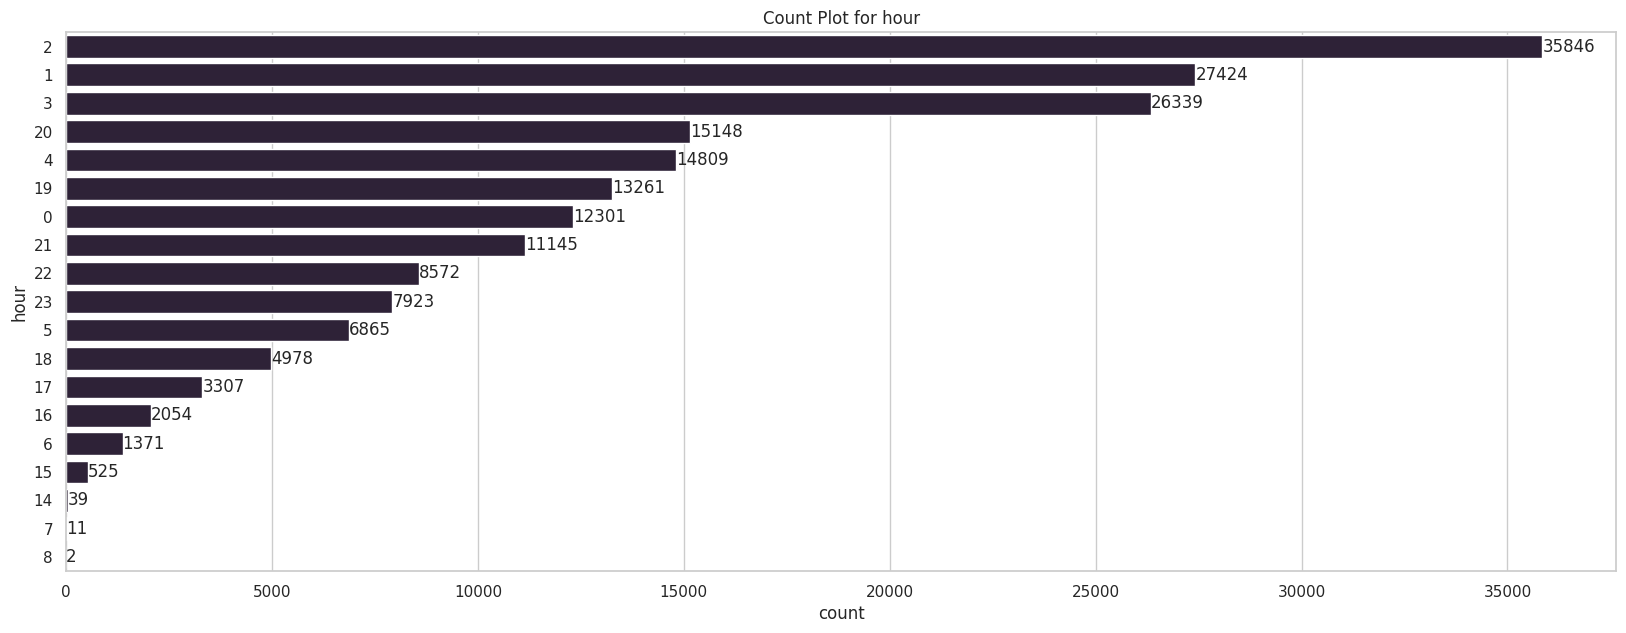

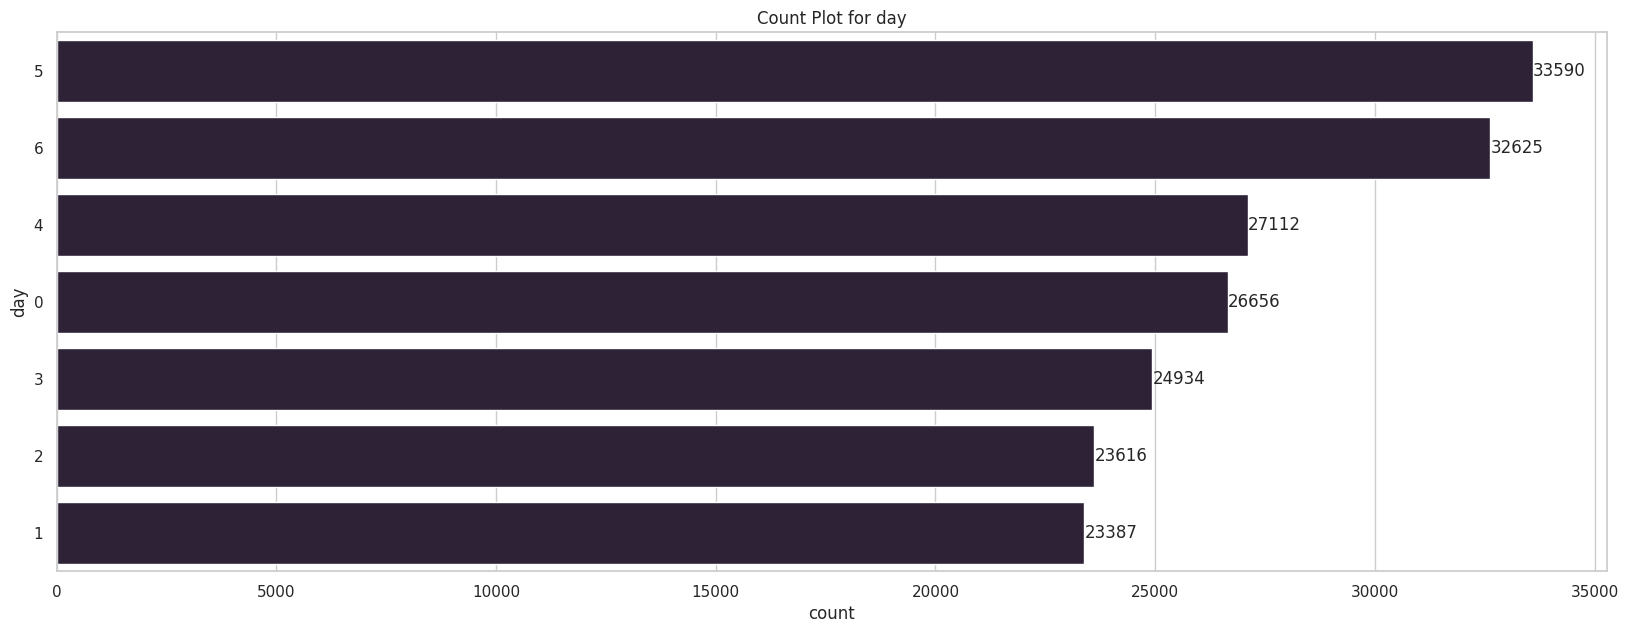

In [27]:
for column in df.columns:
    if len(df[column].unique()) < 30:
        generate_countplot(df, column, fig_size=(20, 7))

In [28]:
def generate_histograms(df, fig_size=(10, 8)):
    num_cols = len(df.columns)
    num_rows = (num_cols + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=fig_size)
    axes = axes.flatten()

    plotted_count = 0

    for i, column in enumerate(df.columns):
        if df[column].dtype in ['int', 'float'] and df[column].nunique() > 20:
            sns.histplot(data=df, x=column, bins=20, kde=True, ax=axes[plotted_count])
            axes[plotted_count].set_title(f'Histogram for {column}', fontsize=15)
            axes[plotted_count].set_xlabel(column, fontsize=12)
            axes[plotted_count].set_ylabel('Frequency', fontsize=12)
            plotted_count += 1


    for j in range(plotted_count, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

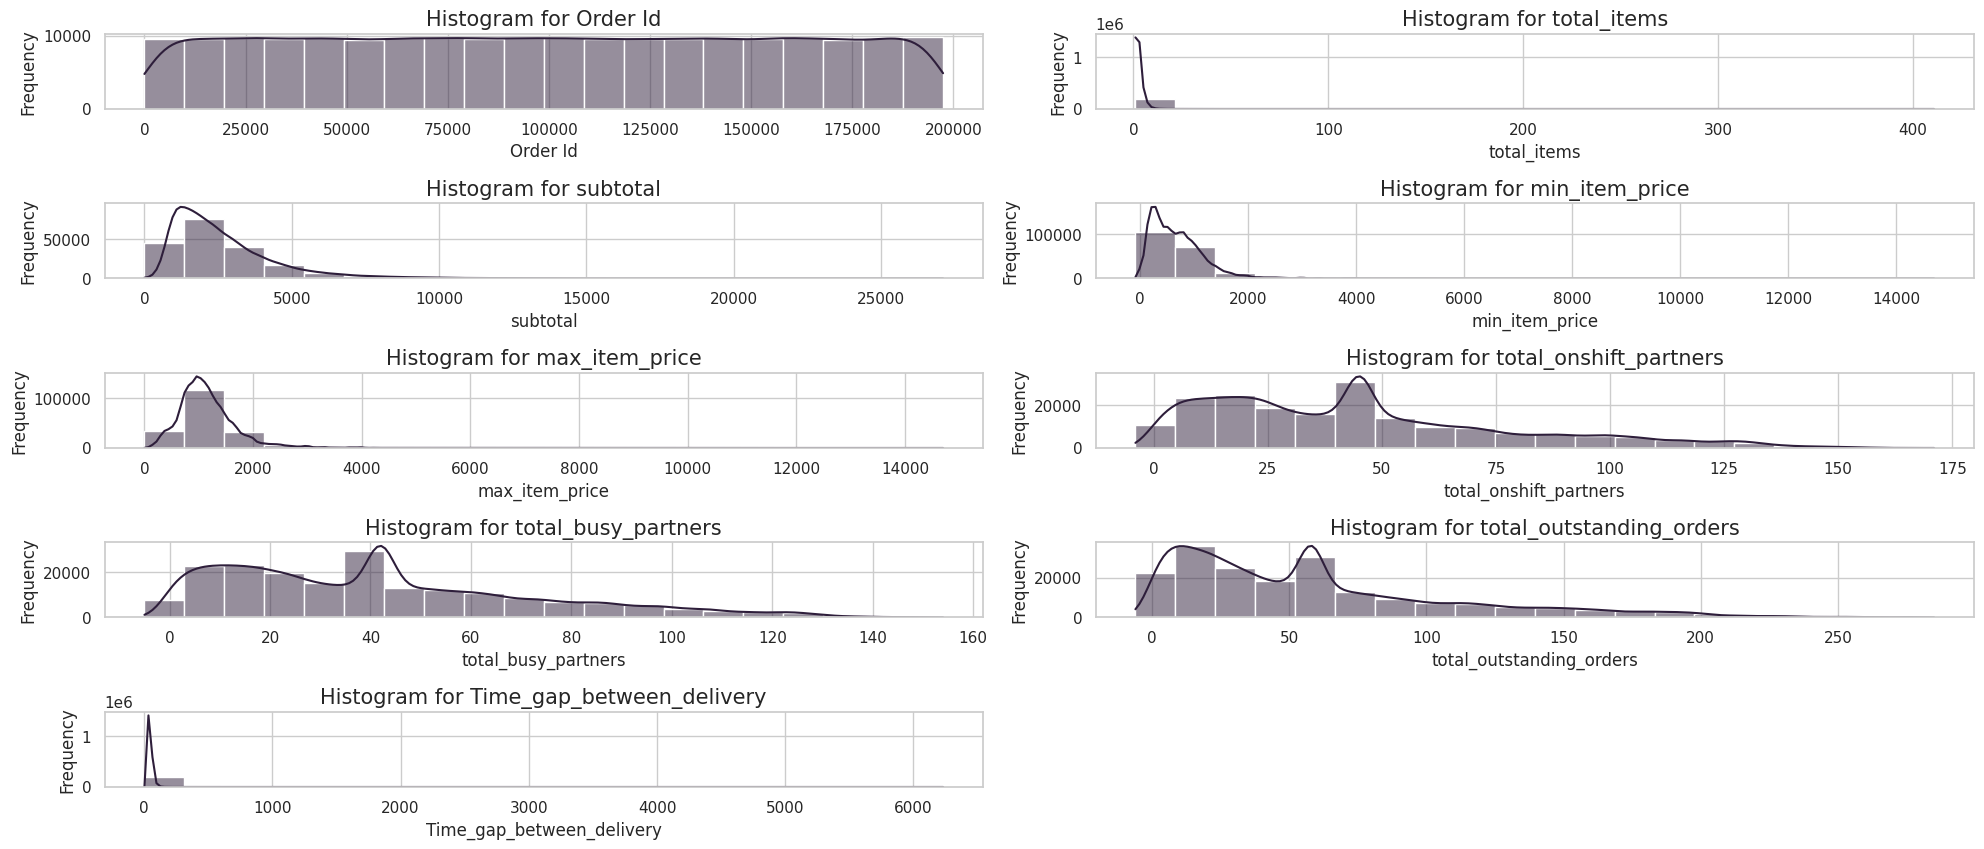

In [29]:
generate_histograms(df, fig_size=(20, 20))

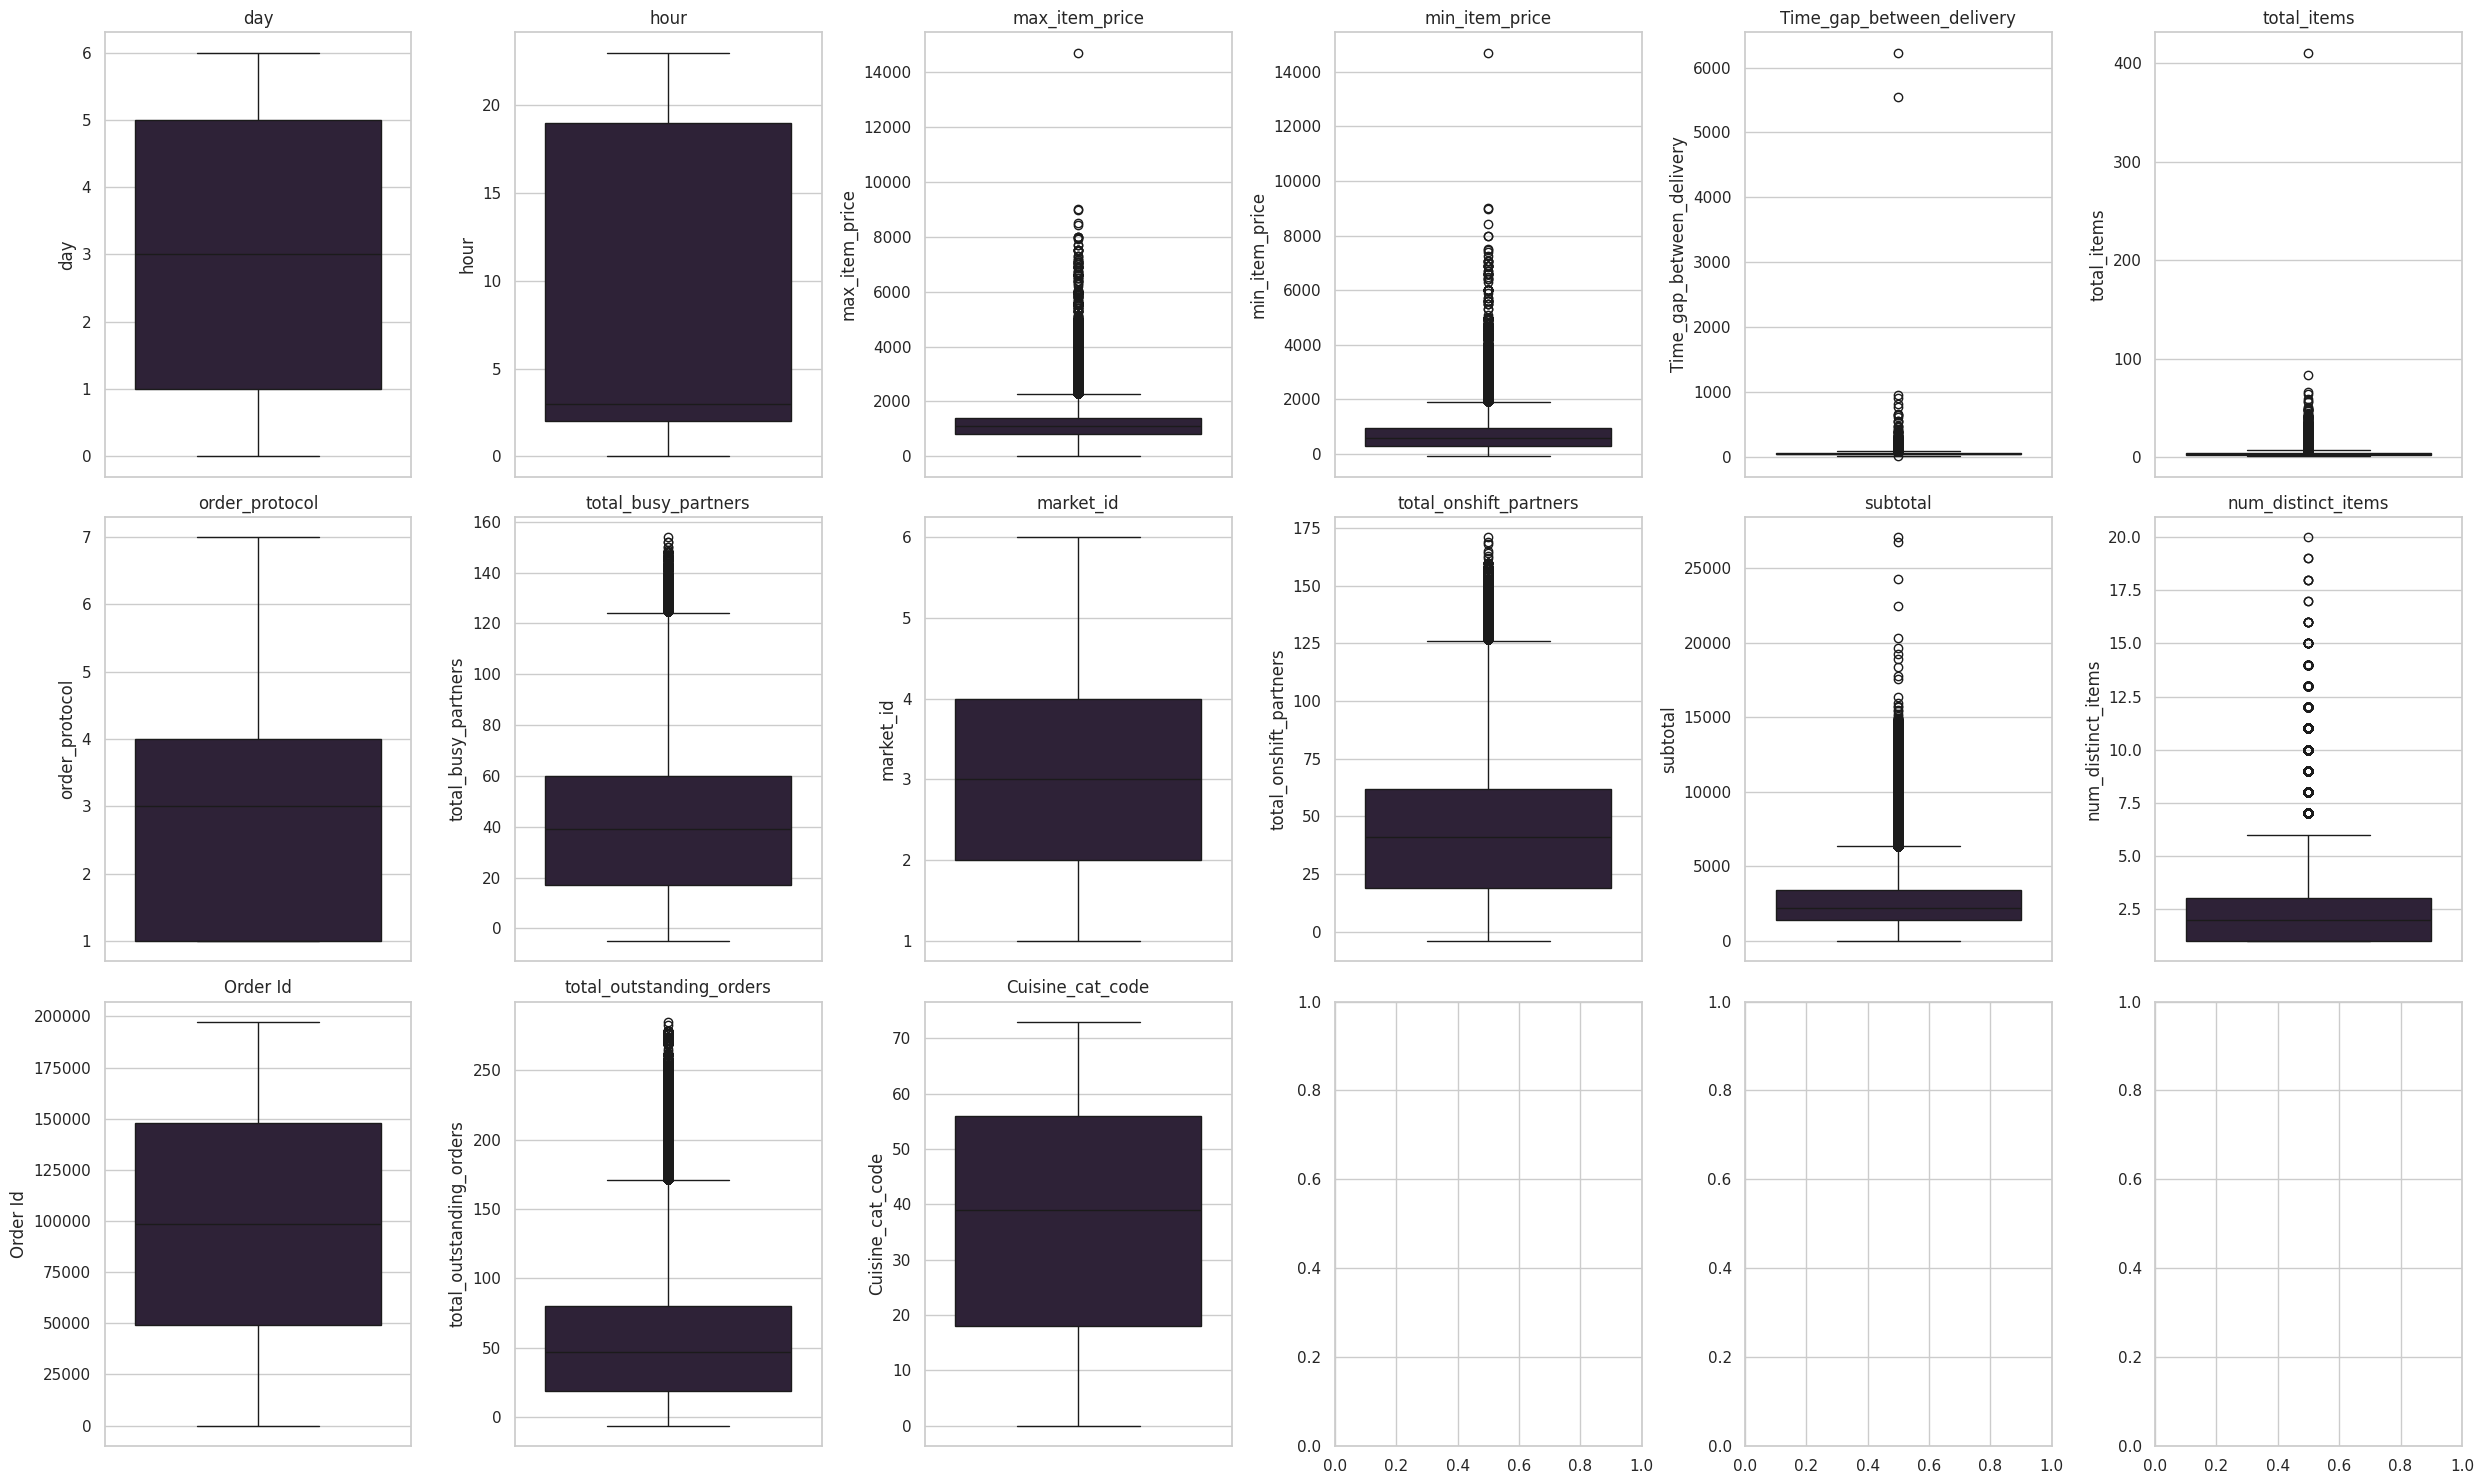

In [30]:
num_var = list(set(df.describe().columns))
num_vars_count = len(num_var)
num_cols = 6
num_rows = math.ceil(num_vars_count / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 5*num_rows))

for i, var in enumerate(num_var):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(y=df[var], ax=axes[row][col])
    axes[row][col].set_title(var)

plt.tight_layout()
plt.show()

# **EDA VIZ**


In [31]:
def count_outliers(df):
    outlier_data = []

    for column in df.select_dtypes(include=['int', 'float']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        lower_outliers = df[df[column] < lower_bound][column].count()
        upper_outliers = df[df[column] > upper_bound][column].count()

        outlier_data.append({
            'Column': column,
            'Total Outliers': lower_outliers + upper_outliers,
            'Lower-bound Outliers': lower_outliers,
            'Higher-bound Outliers': upper_outliers
        })

    outlier_df = pd.DataFrame(outlier_data)

    return outlier_df

In [32]:
count_outliers(df)

,Column,Total Outliers,Lower-bound Outliers,Higher-bound Outliers
0,Order Id,0,0,0
1,market_id,0,0,0
2,order_protocol,0,0,0
3,total_items,9298,0,9298
4,subtotal,8798,0,8798
5,num_distinct_items,5740,0,5740
6,min_item_price,4386,0,4386
7,max_item_price,7488,0,7488
8,total_onshift_partners,4543,0,4543
9,total_busy_partners,2116,0,2116


In [33]:
def remove_outliers(df):
    df_clean = df.copy()
    for column in df_clean.columns:
        if df_clean[column].dtype in ['int64', 'float64']:  # Check if the column contains numerical data
            Q1 = df_clean[column].quantile(0.25)  # First quartile
            Q3 = df_clean[column].quantile(0.75)  # Third quartile
            IQR = Q3 - Q1  # Interquartile range

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            df_clean[column] = df_clean[column].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

    return df_clean


In [34]:
df = remove_outliers(df)

In [35]:
df_s = df

<Axes: xlabel='Time_gap_between_delivery', ylabel='Density'>

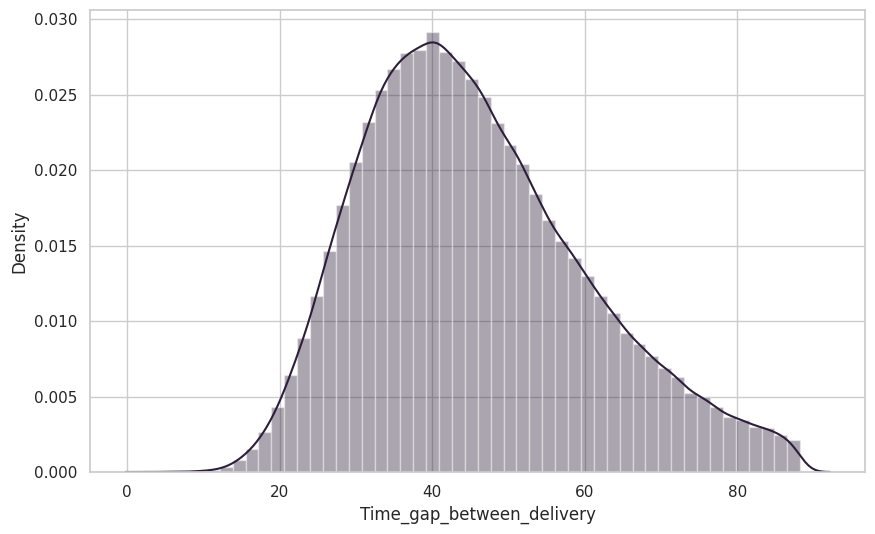

In [36]:
#checking Distribution of the output feature
plt.figure(figsize=(10,6))
sns.distplot(df_s['Time_gap_between_delivery'])

In [37]:
df_s['Time_gap_between_delivery'] = df_s['Time_gap_between_delivery'].fillna(df_s['Time_gap_between_delivery'].mean())
df_s['Time_gap_between_delivery']  = df_s['Time_gap_between_delivery'].astype(int)
df_s['Time_gap_between_delivery']

0         62
1         67
8         26
14        37
15        49
          ..
197423    65
197424    56
197425    50
197426    65
197427    37
Name: Time_gap_between_delivery, Length: 191920, dtype: int64

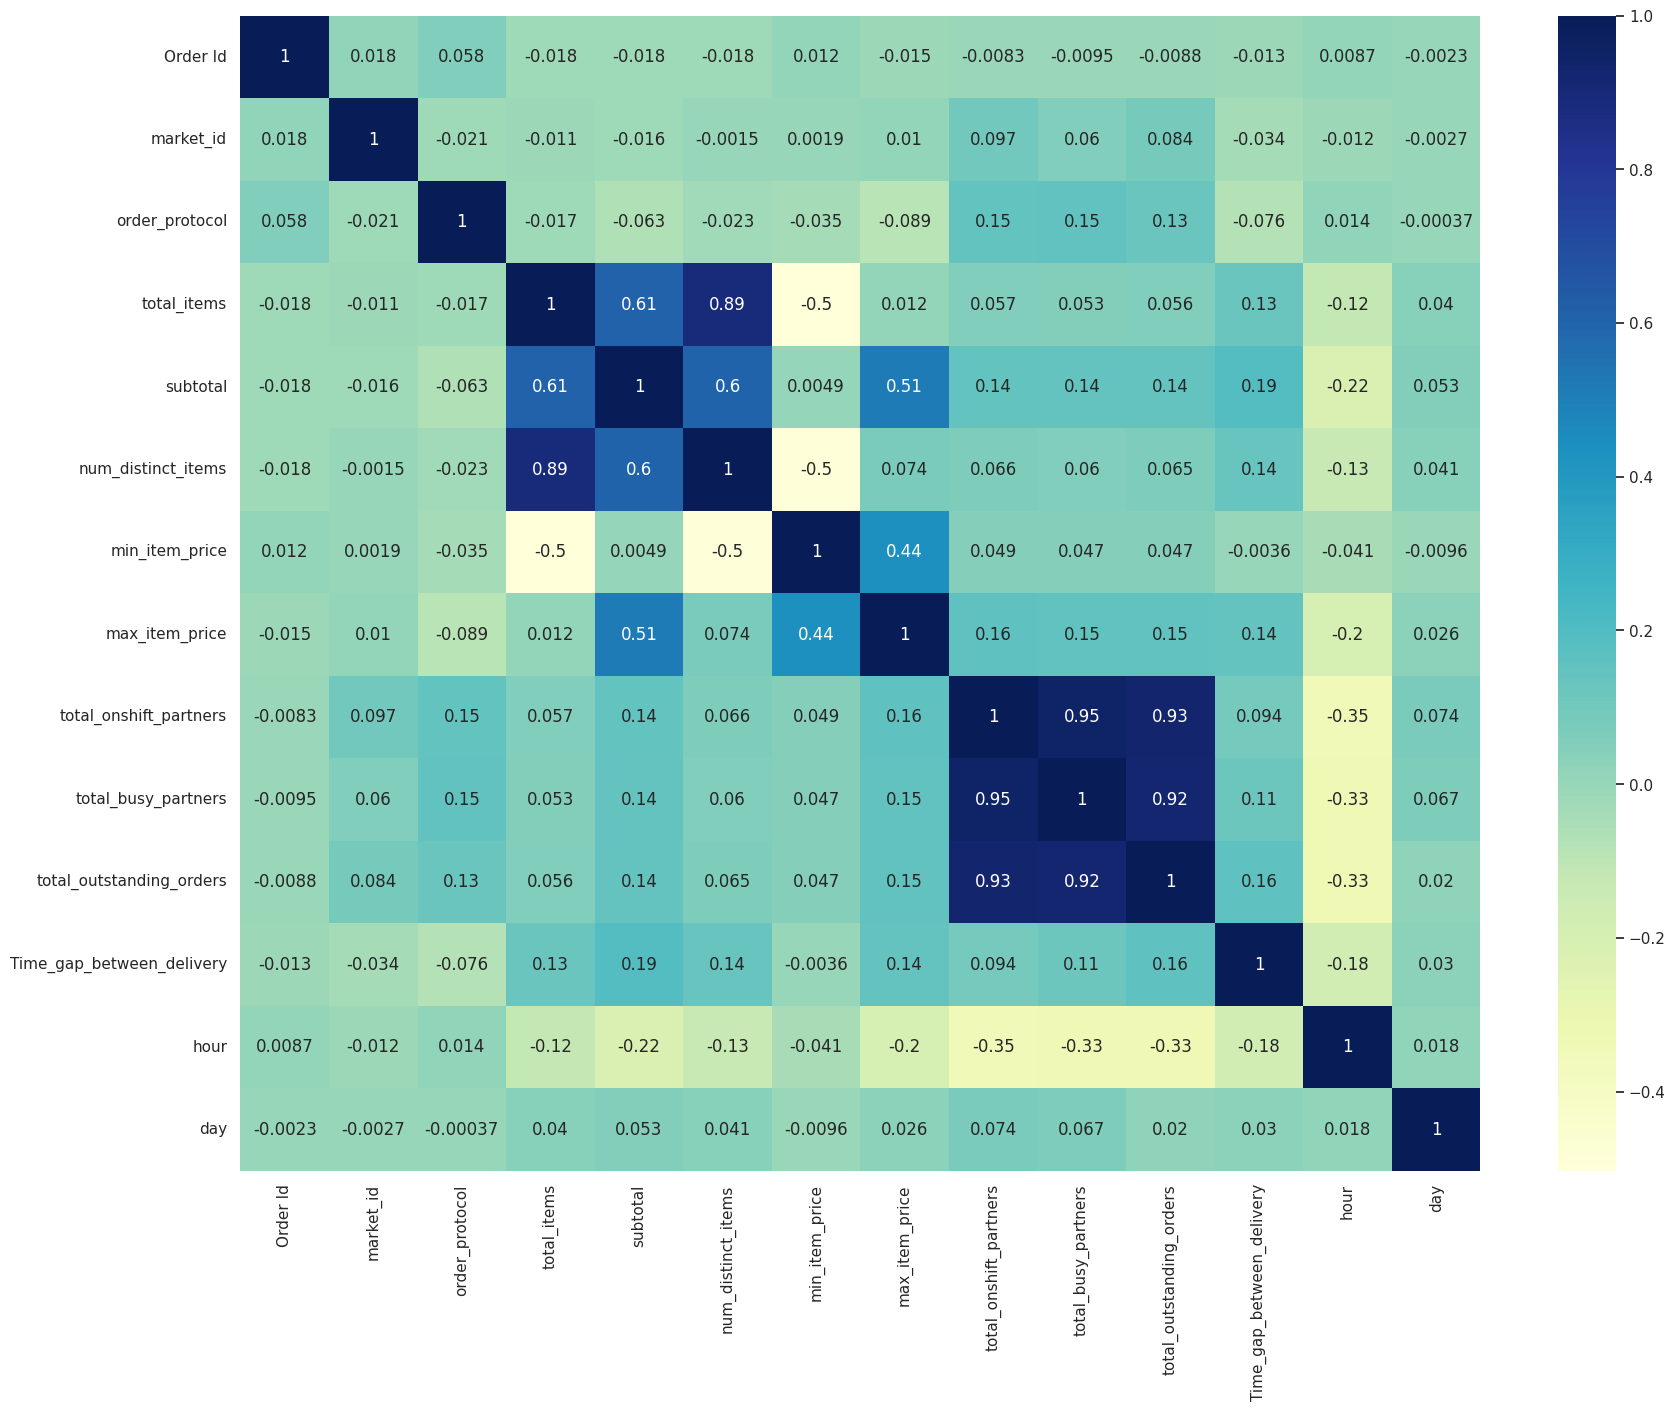

In [38]:
# Select only numerical columns (int and float)
numerical_cols = df_s.select_dtypes(include=['int32', 'float32','int','int64', 'float64'])

# Set the size of the plot
plt.subplots(figsize=(20, 15))

# Create a correlation heatmap
correlation_map = sns.heatmap(numerical_cols.corr(), cmap="YlGnBu", annot=True)

# Display the heatmap
plt.show()

In [39]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191920 entries, 0 to 197427
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Order Id                          191920 non-null  int64         
 1   market_id                         191920 non-null  int64         
 2   created_at                        191920 non-null  datetime64[ns]
 3   Created At (Date)                 191920 non-null  datetime64[ns]
 4   Created At (Time)                 191920 non-null  object        
 5   actual_delivery_time              191920 non-null  datetime64[ns]
 6   store_id                          191920 non-null  object        
 7   Cuisine                           191920 non-null  object        
 8   order_protocol                    191920 non-null  int64         
 9   total_items                       182622 non-null  float64       
 10  subtotal                        

In [40]:
# Drop columns with non-numeric data types
numeric_df = df_s.select_dtypes(include=['int32', 'float32','int','int64', 'float64'])
corr_plot = numeric_df.corr()
cor_target = abs(corr_plot["Time_gap_between_delivery"])
relevant_train_features = cor_target[cor_target > 0.10]
print(relevant_train_features)

total_items                  0.128633
subtotal                     0.192228
num_distinct_items           0.135958
max_item_price               0.142734
total_busy_partners          0.114759
total_outstanding_orders     0.156971
Time_gap_between_delivery    1.000000
hour                         0.176370
Name: Time_gap_between_delivery, dtype: float64


In [41]:
df_s = df_s[["market_id", "Cuisine_cat_code", "order_protocol", "total_items", "subtotal", "num_distinct_items",
             "min_item_price", "max_item_price", "Time_gap_between_delivery", "hour", "day"]]


In [42]:
def fill_null_values(df):
    for column in df.columns:
        if df[column].dtype == 'float64' or df[column].dtype == 'int64':
            if df[column].isnull().sum() > 0:
                if df[column].nunique() <= 100:
                    mode_val = df[column].mode()[0]
                    df[column].fillna(mode_val, inplace=True)
                else:
                    mean_val = df[column].mean()
                    df[column].fillna(mean_val, inplace=True)
    return df


In [43]:
fill_null_values(df_s)
df_s = df_s.astype(int)
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191920 entries, 0 to 197427
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   market_id                  191920 non-null  int64
 1   Cuisine_cat_code           191920 non-null  int64
 2   order_protocol             191920 non-null  int64
 3   total_items                191920 non-null  int64
 4   subtotal                   191920 non-null  int64
 5   num_distinct_items         191920 non-null  int64
 6   min_item_price             191920 non-null  int64
 7   max_item_price             191920 non-null  int64
 8   Time_gap_between_delivery  191920 non-null  int64
 9   hour                       191920 non-null  int64
 10  day                        191920 non-null  int64
dtypes: int64(11)
memory usage: 17.6 MB


# Hypothesis Testing

## H0: There is no significant difference in the average delivery time between different Cuisine categories.

## H1: There is a significant difference in the average delivery time between different Cuisine categories.

# Annova Test

In [44]:
# Define the data for different cuisine categories
cuisine_categories = df['Cuisine'].unique()
grouped_data = [group['Time_gap_between_delivery'].values for name, group in df.groupby('Cuisine')]

# Combine all data points
all_data = np.concatenate(grouped_data)

# Calculate the overall mean
overall_mean = np.mean(all_data)

# Calculate the sum of squares between groups (SSB)
SSB = sum([len(data) * (np.mean(data) - overall_mean)**2 for data in grouped_data])

# Calculate the sum of squares within groups (SSW)
SSW = sum([sum((data - np.mean(data))**2) for data in grouped_data])

# Calculate the degrees of freedom between groups (dfB)
dfB = len(grouped_data) - 1

# Calculate the degrees of freedom within groups (dfW)
dfW = len(all_data) - len(grouped_data)

# Calculate the mean square between groups (MSB)
MSB = SSB / dfB

# Calculate the mean square within groups (MSW)
MSW = SSW / dfW

# Calculate the F-statistic
F = MSB / MSW

# Set the significance level
alpha = 0.05

# Find the critical value from the F-distribution table
critical_value = 3.885  # For alpha = 0.05

# Create a DataFrame to organize the values
data = {
    'Source of Variation': ['Between Groups', 'Within Groups', 'Total'],
    'Sum of Squares (SS)': [SSB, SSW, SSB + SSW],
    'Degrees of Freedom (df)': [dfB, dfW, dfB + dfW],
    'Mean Square (MS)': [MSB, MSW, '-'],
    'F-statistic': [F, '-', '-'],
    'Critical Value': [critical_value, '-', '-'],
    'Result': ['Reject-Null Hypothesis' if F > critical_value else 'Fail to Reject-Null Hypothesis', '-', '-']
}

# Create the DataFrame
anova_df = pd.DataFrame(data)

anova_df

,Source of Variation,Sum of Squares (SS),Degrees of Freedom (df),Mean Square (MS),F-statistic,Critical Value,Result
0,Between Groups,7.548772e+05,73,10340.783718,50.030029,3.885,Reject-Null Hypothesis
1,Within Groups,3.965295e+07,191846,206.691542,-,-,-
2,Total,4.040782e+07,191919,-,-,-,-


# Linear Reggression

In [45]:
# Using Pandas get Dummies for Encoding categorical features
df_s = pd.get_dummies(df_s,drop_first=True,sparse=False)
X = df_s.drop(columns=['Time_gap_between_delivery'], axis=1)
y = df_s['Time_gap_between_delivery']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=100)

# Fit linear regression model
LR = LinearRegression()
LR.fit(X_train, y_train)


LinearRegression()

In [46]:
# Interpret regression coefficients
coefficients = LR.coef_
intercept = LR.intercept_
print("Intercept:", intercept)
print("Coefficients:", coefficients)


Intercept: 43.293163639090416
Coefficients: [-0.33227452  0.00669042 -0.61627438  0.01551963  0.00108449  0.43246322
 -0.00074851  0.00239541 -0.23030522  0.15587684]


In [47]:
# Make predictions
# Predicted Train & Test values

y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)

print("Predictions :",y_pred_test)


Predictions : [39.31737071 48.48170485 49.90111128 ... 42.26250921 44.76056043
 45.82042089]


In [48]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 197.8921204060554
RMSE : 14.067413422731821
MAE : 11.182021909619621
R2 : 0.06256970770488413
Adjusted R2 : 0.0624068604379171


In [49]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [50]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 195.38275613170705
RMSE : 13.977938193156637
MAE : 11.102308031525617
R2 : 0.06625561530902924
Adjusted R2 : 0.06609340834565025


In [51]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

# Decision Trees

In [52]:
#Initilazing the model
dt_regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=8, max_features=9, max_leaf_nodes=100)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features=9, max_leaf_nodes=100)

In [53]:
#Train Test values
y_pred_train_d = dt_regressor.predict(X_train)
y_pred_test_d = dt_regressor.predict(X_test)

In [54]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 180.62532424222942
RMSE : 13.4396921185803
MAE : 10.659889866436655
R2 : 0.14436385767731663
Adjusted R2 : 0.1442152194175541


In [55]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df._append(dict1,ignore_index=True)

In [56]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 179.58075091160956
RMSE : 13.400774265377711
MAE : 10.617456433207515
R2 : 0.14177422264803674
Adjusted R2 : 0.1416251345255053


In [57]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df._append(dict2,ignore_index=True)

# Random Forest reggresor

In [58]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [59]:
# Make predictions
# Predicted Train & Test values

y_pred_train_rf = regressor.predict(X_train)
y_pred_test_rf = regressor.predict(X_test)

print("Predictions :",y_pred_test)


Predictions : [39.31737071 48.48170485 49.90111128 ... 42.26250921 44.76056043
 45.82042089]


In [60]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 26.642868268364793
RMSE : 5.161673010600807
MAE : 4.037848164098368
R2 : 0.8737906707091445
Adjusted R2 : 0.8737687460449751


In [61]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Random Forest Regg ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df._append(dict1,ignore_index=True)

In [62]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 181.8696930208213
RMSE : 13.485907200511996
MAE : 10.684591546238796
R2 : 0.13083524889377962
Adjusted R2 : 0.13068426048917503


In [63]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Random Forest Regg ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df._append(dict2,ignore_index=True)

# XGB ReGG

In [64]:
# Initializing the model
xgb_r = xgb.XGBRegressor()

#Fitting the model
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
#Train Test values
y_pred_train_xgb = xgb_r.predict(X_train)
y_pred_test_xgb = xgb_r.predict(X_test)

In [66]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_xgb))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_xgb))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_xgb))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 155.54066495981417
RMSE : 12.471594323093345
MAE : 9.859519829071704
R2 : 0.2631918303878379
Adjusted R2 : 0.2630638345275734


In [67]:
dict1={'Model':'XG Boost Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df._append(dict1,ignore_index=True)

In [68]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_xgb))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_xgb))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_xgb))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 169.43066955243617
RMSE : 13.016553674165683
MAE : 10.285505979213845
R2 : 0.19028199099426601
Adjusted R2 : 0.19014132947962936


In [69]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'XG Boost Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df._append(dict2,ignore_index=True)

In [70]:
# Feature importances
xgb_r.feature_importances_

array([0.0926271 , 0.06062068, 0.09774703, 0.03816634, 0.11510456,
       0.04021067, 0.03843552, 0.04384802, 0.31403473, 0.15920535],
      dtype=float32)

In [71]:
features = X_train.columns
importances = xgb_r.feature_importances_
indices = np.argsort(importances)

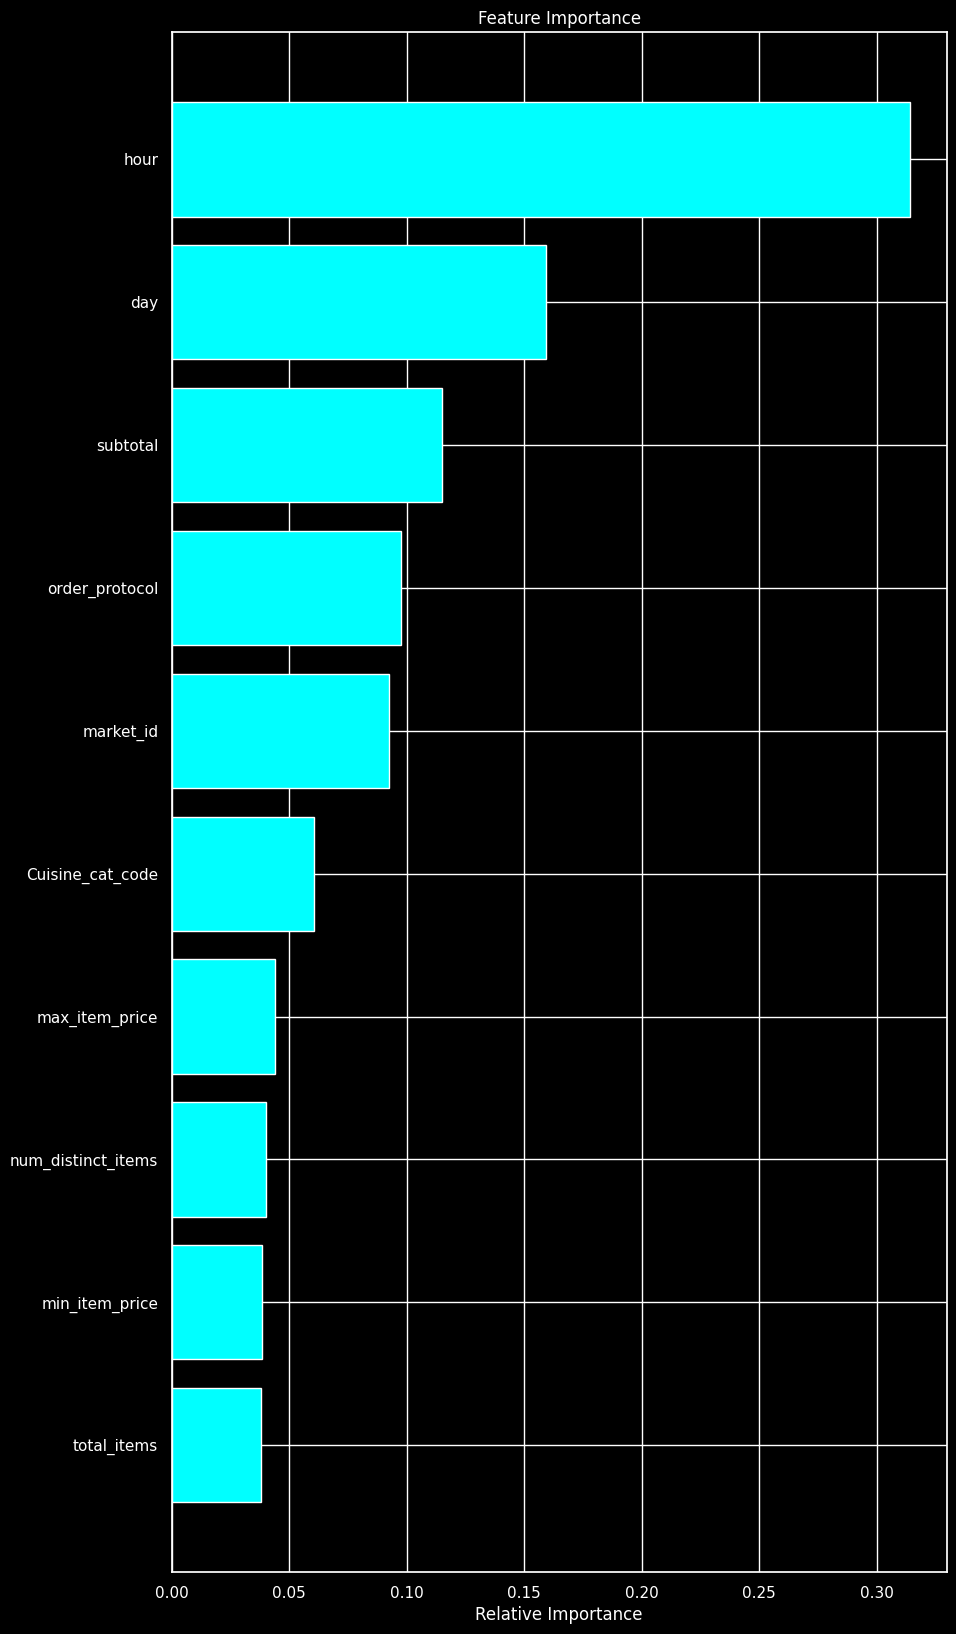

In [72]:
plt.style.use('dark_background')
#Plotting figure
plt.figure(figsize=(10,20))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# XGB Regressor with Hyperparameter Tuning

In [73]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
parameter_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [74]:
parameter_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [75]:
# Create an instance of the XG Boost Regressor
xg_boost = xgb.XGBRegressor()

# Grid search
xg_grid = GridSearchCV(estimator=xg_boost,
                       param_grid = parameter_dict,
                       cv = 5, verbose=2)

xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [76]:
xg_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, min_samples_leaf=40, min_samples_split=50,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=50, n_jobs=None, ...)

In [77]:
xg_optimal_model = xg_grid.best_estimator_
#Train Test values
y_pred_train_xg_opt = xg_optimal_model.predict(X_train)
y_pred_test_xg_opt= xg_optimal_model.predict(X_test)

In [78]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_xg_opt))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_xg_opt))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_xg_opt))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 162.9996300511634
RMSE : 12.767130846480873
MAE : 10.105212548032792
R2 : 0.22785813538545407
Adjusted R2 : 0.22772400147342164


In [79]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'XG boost regg GridserachCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df._append(dict1,ignore_index=True)

In [80]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_xg_opt))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_xg_opt))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_xg_opt))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 169.46249049906535
RMSE : 13.01777594288154
MAE : 10.29507912621492
R2 : 0.1901299170302232
Adjusted R2 : 0.18998922909780414


In [81]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'XG boost regg GridserachCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df._append(dict2,ignore_index=True)

In [82]:
xg_optimal_model.feature_importances_

array([0.08841651, 0.05444938, 0.0888418 , 0.03068157, 0.13489468,
       0.0342403 , 0.03070855, 0.03859157, 0.3399014 , 0.15927424],
      dtype=float32)

In [83]:
xg_optimal_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, min_samples_leaf=40, min_samples_split=50,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=50, n_jobs=None, ...)

In [84]:
features = X_train.columns
importance = xg_optimal_model.feature_importances_
index = np.argsort(importance)

Text(0.5, 0, 'Relative Importance')

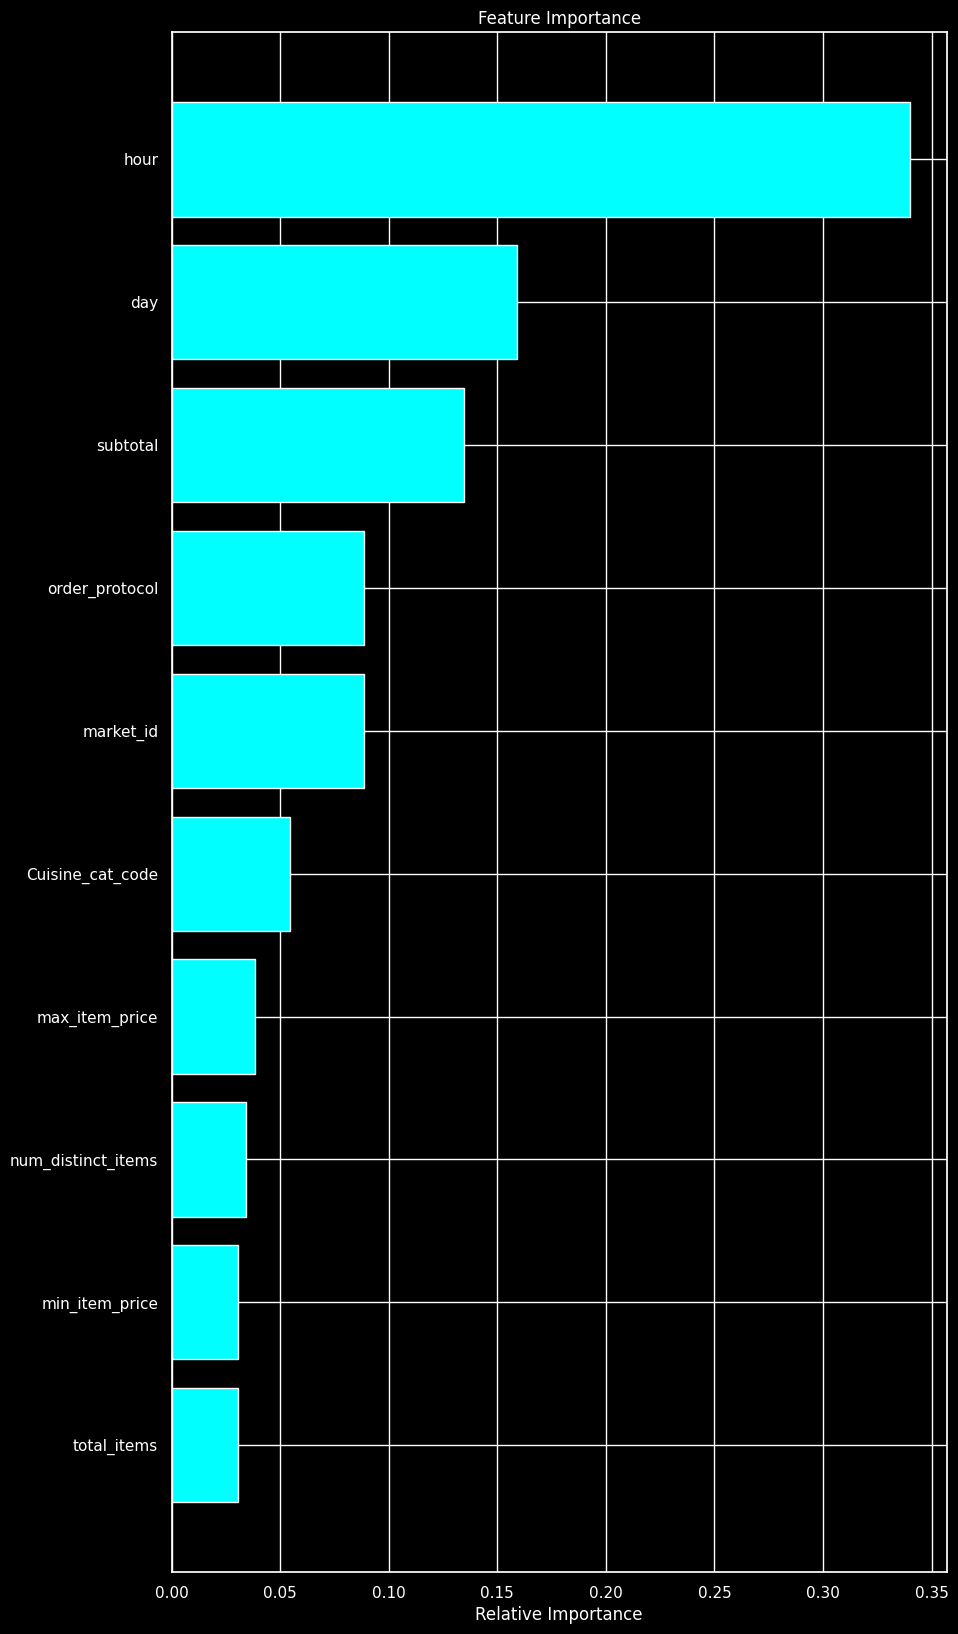

In [85]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(index)), importance[index], color='aqua', align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')

In [86]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model     MAE      MSE    RMSE     R2  \
Training set 0          Linear regression   11.182  197.892  14.067  0.063   
             1    Decision tree regression  10.660  180.625  13.440  0.144   
             2         Random Forest Regg    4.038   26.643   5.162  0.874   
             3         XG Boost Regression   9.860  155.541  12.472  0.263   
             4  XG boost regg GridserachCV  10.105  163.000  12.767  0.228   
Test set     0          Linear regression   11.102  195.383  13.978  0.066   
             1    Decision tree regression  10.617  179.581  13.401  0.142   
             2         Random Forest Regg   10.685  181.870  13.486  0.131   
             3         XG Boost Regression  10.286  169.431  13.017  0.190   
             4  XG boost regg GridserachCV  10.295  169.462  13.018  0.190   

                Adj_R2  
Training set 0    0.06  
             1    0.14  
             2    0.87  
             3    0.26  
             4    0.23  
Test set     0    0.07  
             1    0.14  
             2    0.13  
             3    0.19  
             4    0.19

# Predictions using Best performing model

In [87]:
# Make predictions using the XGBoost Regressor hyperparameter tuning model
features = df_s[["market_id", "order_protocol", "total_items", "subtotal", "num_distinct_items",
                 "min_item_price", "max_item_price", "Cuisine_cat_code", "hour", "day"]].values

predictions = xg_optimal_model.predict(features)

# Add the predictions as a new column named 'cusine_code' to the DataFrame
df_s['Time_taken'] = predictions
df_s['Time_taken'] = df_s['Time_taken'].astype(int)

In [88]:
#please give time interval in diffrence of 5 for eg: 30-35

def filter_delivery_time_by_range(df):
    user_input = input("Enter the range of time taken to get Cuisine Category (format: min-max): ")
    min_time, max_time = map(int, user_input.split('-'))
    filtered_df = df[(df['Time_taken'] >= min_time) & (df['Time_taken'] <= max_time)]
    print(f'Top 15 Cuisine which takes {min_time}-{max_time} minutes to deliver')
    return filtered_df['Cuisine_cat_code']


filtered_cuisine_cat_codes = filter_delivery_time_by_range(df_s)
cuisine_info = df[['Cuisine', 'Cuisine_cat_code']]
final_df = pd.merge(filtered_cuisine_cat_codes, cuisine_info, on='Cuisine_cat_code', how='inner')
top_15_cuisines_count = final_df['Cuisine'].value_counts().head(15)
top_15_cuisines = pd.DataFrame(top_15_cuisines_count.index, columns=['Cuisine'])
top_15_cuisines

Enter the range of time taken to get Cuisine Category (format: min-max): 60-65
Top 15 Cuisine which takes 60-65 minutes to deliver


,Cuisine
0,pizza
1,american
2,mexican
3,chinese
4,burger
5,japanese
6,italian
7,indian
8,dessert
9,thai
